In [1]:
import numpy as np
import sklearn as sk
import mglearn as mg
import matplotlib.pyplot as plt

/home/lucifer/ed/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/home/lucifer/ed/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


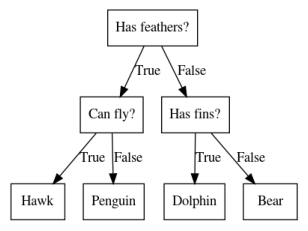

In [2]:
mg.plots.plot_animal_tree()

In [5]:
cancer_dataset = sk.datasets.load_breast_cancer()
Xtrain, Xtest, ytrain, ytest = sk.model_selection.train_test_split(cancer_dataset.data, cancer_dataset.target, stratify = cancer_dataset.target, random_state = 42)
tree = sk.tree.DecisionTreeClassifier()
tree.fit(Xtrain, ytrain)
print("Training Accuracy: {:.2f}".format(tree.score(Xtrain, ytrain)))
print("Testing Accuracy: {:.2f}".format(tree.score(Xtest, ytest)))

## Applying Pre-Pruning to the tree
tree_prepruned = sk.tree.DecisionTreeClassifier(max_depth = 4, random_state = 0)
tree_prepruned.fit(Xtrain, ytrain)
print("Training Accuracy: {:.2f}".format(tree_prepruned.score(Xtrain, ytrain)))
print("Testing Accuracy: {:.2f}".format(tree_prepruned.score(Xtest, ytest)))


Training Accuracy: 1.00
Testing Accuracy: 0.94
Training Accuracy: 0.99
Testing Accuracy: 0.95


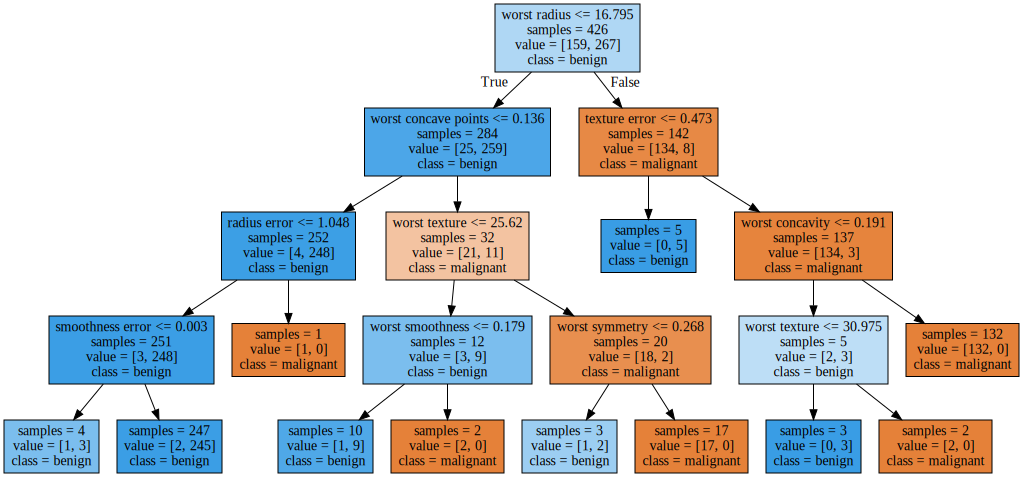

In [6]:
# Visualize the tree
sk.tree.export_graphviz(tree_prepruned, out_file="tree.dot", class_names = ["malignant", "benign"], feature_names = cancer_dataset.feature_names, impurity = False, filled = True)
import graphviz 
with open("tree.dot") as f:
    dot_graph  = f.read()
graphviz.Source(dot_graph)

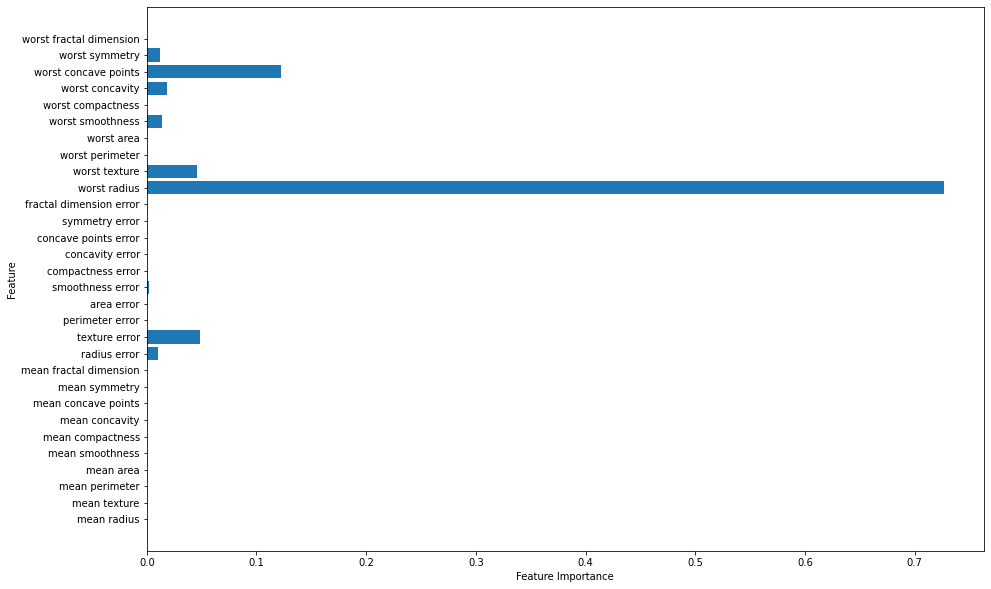

In [9]:
## Plot feature importance of the tree
plt.figure(figsize=(15, 10))
def plot_feature_importance(model):
    n_features = cancer_dataset.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer_dataset.feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    
plot_feature_importance(tree_prepruned)